# Fire Detection

In this assignment, we will develop a model to detect the occurance of fires from images. We will use a dataset of images taken from various security cameras sorted into three categories: default (no fire), smoke or fire. The resulting model could be deployed to alert authorities to the location of fires captured by security cameras installed in various locations (building, shops, streets, wilderness...).

To obtain the dataset, the below cell has been prepared for you. To be able to run it, upload the shared "kaggle.json" file into the Colab virtual storage. Once ran, the dataset will be downloaded to Colab's storage in a folder called "data". Images are placed in folders named after those images' label.

In [7]:
#@title Run this to download the dataset
%%capture
import os
from sklearn.model_selection import train_test_split
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

!kaggle datasets download -d ritupande/fire-detection-from-cctv
!unzip -qn \*.zip
!rm -r /content/data/data
!rm -r /content/data/video_data

# Dataset Preparation

The first step is to prepare the images for classification. We'll start by defining a set of functions to read and process the images.

*1) Write a utility function "list_dataset" that returns:*
- *a list containing the file paths for all images in a given folder (train or test).*
- *a list containing the corresponding label for each image (taken from the folder's name.*

*2) Write a function "load_dataset" that takes the lists provided by "list_dataset" to:*
- *load all the images into memory.*
- *preprocess the images (resizing and normalizing).*
- *one-hot encode the labels.*
- *shuffle the samples.*

*3) Write a function "show_image_and_label" that displays an image along with its label and its prediction if provided (if no prediction is provided just show write a blank or "no prediction").*

In [8]:
pip install python-resize-image

The one-hot encoding code is taken from: Introducing convolutional neural networks using keras on DataCamp (Chapter 1) --> This is not the required datacamp https://campus.datacamp.com/courses/image-processing-with-keras-in-python/image-processing-with-neural-networks?ex=4 

In [188]:
import os
import glob
import numpy as np
from keras.utils import to_categorical
from PIL import Image
import cv2
from sklearn.utils import shuffle
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.models import Sequential 
from keras.layers import Dense 


#seed everything
SEED = 1
import tensorflow
tensorflow.random.set_seed(SEED)
np.random.seed(SEED)

#1
def _list_dataset(parent_dir):
    """
    Returns a list of image names (full path) and their corresponding labels from a given directory.
    """
    #Hint: os.listdir lists the names of all the files in a given folder, you need the full path not just the names so you can load the images   later
    list_image_names_default = [parent_dir + '/default/' + dir for dir in os.listdir(parent_dir + '/default/')]
    list_labels_default = ['default']*len(list_image_names_default)

    list_image_names_fire = [parent_dir + '/fire/' + dir for dir in os.listdir(parent_dir + '/fire/')]
    list_labels_fire = ['fire']*len(list_image_names_fire)

    list_image_names_smoke = [parent_dir + '/smoke/' + dir for dir in os.listdir(parent_dir + '/smoke/')]
    list_labels_smoke = ['smoke']*len(list_image_names_smoke)

    #join the three lists
    image_names = list_image_names_default+ list_image_names_fire+list_image_names_smoke
    labels = list_labels_default+ list_labels_fire+list_labels_smoke
    return image_names,labels 

#2
def load_dataset(train_path, test_path):
    """
    Returns an array containing all the images along with an array containing their corresponding labels.
    """
    #load train image names and labels
    trainimage,trainlabels=_list_dataset(train_path)

    #load test image names and labels
    testimage,testlabels=_list_dataset(test_path)

    #join the two subsets to have the full dataset
    joinimage= trainimage+testimage
    joinlabels=trainlabels+testlabels

    #store labels in a Numpy array
    joinlabelsnp=np.array(joinlabels)

    #one-hot encoding of the labels
    labels_ = np.array(["default", "fire", "smoke"])
    n_categories = 3
    ohe_labels = np.zeros((len(joinlabelsnp), n_categories))
    for ii in range(len(joinlabelsnp)):    
      jj = np.where(labels_ == joinlabelsnp[ii])    
      ohe_labels[ii, jj] = 1

 
    #Prepare images: read, resize to 224x224 and normalize them so that pixel values are between 0 and 1. Images must be stored in a Numpy array
    normalized=[]
    for i in (joinimage):

          image = cv2.imread(i) 
          resizeimage=cv2.resize(image,(224,224))
          normalized_image=resizeimage/255
          normalized_image=np.array(normalized_image) 
          normalized.append(normalized_image)

    normalized=np.array(normalized)

    #shuffle them since we loaded them in order           
    resizeimage_shuffle,ohe_labels_shuffle=shuffle(normalized,ohe_labels,random_state=SEED)
    
    return resizeimage_shuffle,ohe_labels_shuffle

#3
def show_image_and_label(X, y, index):
  
    encod_lab = {
        'default' : [1, 0 , 0],
        'fire' : [0, 1, 0],
        'smoke' : [0, 0, 1]
    }
    label = 'Nan'
    for i in encod_lab.keys():
      if y[index].tolist() ==  encod_lab[i]:
        label = i
    
    cv2_imshow(X[index]*255)
    print (label)

*4) Use the function you wrote to load the dataset and split it for training and testing. Print the shapes of the sets after splitting.*

In [10]:
#your code here
image,labels = load_dataset('/content/data/img_data/train','/content/data/img_data/test')

X_train, X_test, y_train, y_test = train_test_split(image, labels, test_size = 0.2, random_state = SEED) #from 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state= SEED)

print ("Train  set shape:", X_train.shape)
print ("Test  set shape:", X_test.shape)
print ("Validation  set shape:", X_val.shape)




Train  set shape: (518, 224, 224, 3)
Test  set shape: (173, 224, 224, 3)
Validation  set shape: (173, 224, 224, 3)


*5) Look at the distribution of the classes.*

In [11]:
#plotting source: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#initiliaze a counter since nothing was found online 

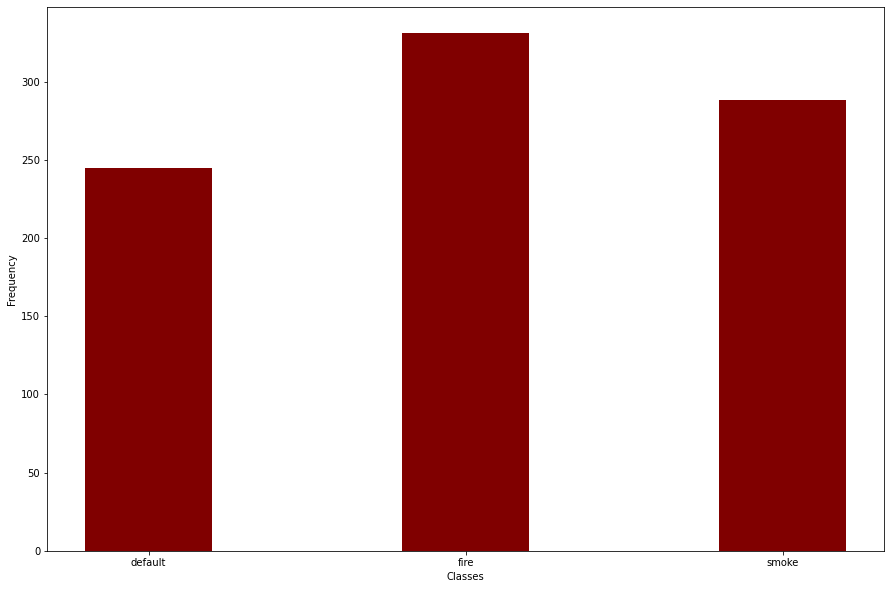

In [12]:
#did not found a library online so I did it manually 

i1,i2,i3=0,0,0
for i in range(len(labels)):
  if labels[i].tolist()==[1,0,0]: 
    i1=i1+1
  if labels[i].tolist()==[0,1,0]: 
    i2=i2+1
  if labels[i].tolist()==[0,0,1]: 
    i3=i3+1

   
# creating the dataset 
data = {'default':i1, 'fire':i2, 'smoke':i3} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (15, 10)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Classes") 
plt.ylabel("Frequency") 
plt.show() 


*6) Use the function you wrote to show one image belonging to each class.*

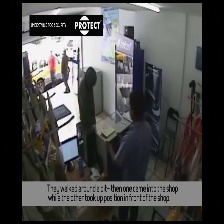

default


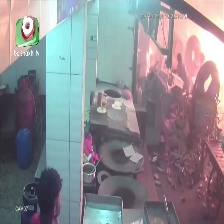

fire


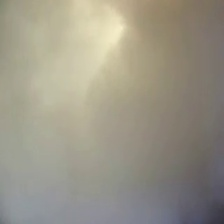

smoke


In [189]:
#your code here

show_image_and_label (image, labels, 10)

show_image_and_label (image, labels, 140)

show_image_and_label (image, labels, 100)


SOURCE: Prof Julia Zini coding session

# Fully Connected Neural Network

First, we will solve this classification using a fully connected neural network.

*7)*
- *Flatten the images. Show the shapes of the datasets after reshaping.*
- *Build a fully connected neural network.*
- *Print the network's architecture also showing the number of trainable parameters.*
- *Train it on the data and show the training and validation loss curves. Print the value of the last training loss.*
- *Play with the different hyperparameters (number of layer, number of neurons, optimizer, regularization, epochs, batch size...) until you obtain a satisfactory behavior.*
- *Comment on the behavior of the model you obtain based on the learning curves.*

Flatten the images. Show the shapes of the datasets after reshaping 


In [14]:
image_vector_size = 224*224*3
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)
X_val = X_val.reshape(X_val.shape[0], image_vector_size)


Build a fully connected neural network + Print the network's architecture also showing the number of trainable parameters (using summary()) 

In [22]:
image_size = 224*224*3


image_size = 224*224*3
h_units = [75, 55, 122,150,220]
out_units = 3

model1 = Sequential() # neural network

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model1.add(Dense(units=h_units[0], activation='relu', input_shape=(image_size,)))

for u in range(1, len(h_units)):
  model1.add(Dense(units=h_units[u], activation='relu'))

model1.add(Dense(out_units, activation='softmax'))


model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 75)                11289675  
_________________________________________________________________
dense_13 (Dense)             (None, 55)                4180      
_________________________________________________________________
dense_14 (Dense)             (None, 122)               6832      
_________________________________________________________________
dense_15 (Dense)             (None, 150)               18450     
_________________________________________________________________
dense_16 (Dense)             (None, 220)               33220     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 663       
Total params: 11,353,020
Trainable params: 11,353,020
Non-trainable params: 0
__________________________________________

Train it on the data and show the training and validation loss curves. Print the value of the last training loss.+
Play with the different hyperparameters (number of layer, number of neurons, optimizer, regularization, epochs, batch size...) until you obtain a satisfactory behavior

Adam optimizer did a better job than other optimizer like SGD 
This is Method #1

Epoch 1/12
6/6 - 0s - loss: 1.8764 - accuracy: 0.6776 - val_loss: 0.7585 - val_accuracy: 0.7341
Epoch 2/12
6/6 - 0s - loss: 0.6097 - accuracy: 0.7452 - val_loss: 0.4562 - val_accuracy: 0.8728
Epoch 3/12
6/6 - 0s - loss: 0.3432 - accuracy: 0.8803 - val_loss: 0.4066 - val_accuracy: 0.8786
Epoch 4/12
6/6 - 0s - loss: 0.2827 - accuracy: 0.9112 - val_loss: 0.4585 - val_accuracy: 0.8092
Epoch 5/12
6/6 - 0s - loss: 0.2579 - accuracy: 0.9112 - val_loss: 0.3829 - val_accuracy: 0.8902
Epoch 6/12
6/6 - 0s - loss: 0.2535 - accuracy: 0.9073 - val_loss: 0.3786 - val_accuracy: 0.8671
Epoch 7/12
6/6 - 0s - loss: 0.2293 - accuracy: 0.9305 - val_loss: 0.3702 - val_accuracy: 0.9133
Epoch 8/12
6/6 - 0s - loss: 0.1739 - accuracy: 0.9498 - val_loss: 0.4639 - val_accuracy: 0.8728
Epoch 9/12
6/6 - 0s - loss: 0.2439 - accuracy: 0.9151 - val_loss: 0.4371 - val_accuracy: 0.8902
Epoch 10/12
6/6 - 0s - loss: 0.1754 - accuracy: 0.9421 - val_loss: 0.4110 - val_accuracy: 0.8786
Epoch 11/12
6/6 - 0s - loss: 0.1369 - a

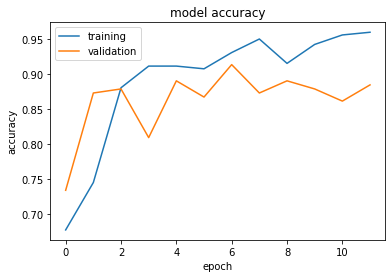

Validation loss: 0.452
Validation accuracy: 0.884


In [45]:
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
history = model1.fit(X_train, y_train, batch_size=100, epochs=12, verbose=2, validation_data=(X_val, y_val)) # talk about validation_split
loss, accuracy  = model1.evaluate(X_val, y_val, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

With regularizer from Prof Julia Session Method #2

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 75)                11289675  
_________________________________________________________________
dense_169 (Dense)            (None, 55)                4180      
_________________________________________________________________
dense_170 (Dense)            (None, 122)               6832      
_________________________________________________________________
dense_171 (Dense)            (None, 150)               18450     
_________________________________________________________________
dense_172 (Dense)            (None, 220)               33220     
_________________________________________________________________
dense_173 (Dense)            (None, 3)                 663       
Total params: 11,353,020
Trainable params: 11,353,020
Non-trainable params: 0
_________________________________________

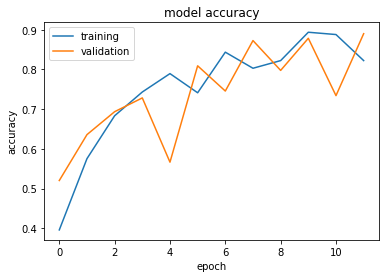

Validation loss: 0.424
Validation accuracy: 0.89


In [54]:
from keras import regularizers

lmbda = 0.00001

model2 = Sequential() # neural network

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model2.add(Dense(units=h_units[0], activation='relu', input_shape=(image_size,)))

for u in range(1, len(h_units)):
  model2.add(Dense(units=h_units[u], activation='relu', 
                  kernel_regularizer=regularizers.l2(lmbda) # you can change to .l1
                  )
  )

model2.add(Dense(out_units, activation='softmax'))

model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(X_train, y_train, batch_size=14, epochs=12, verbose=2, validation_data=(X_val, y_val)) # talk about validation_split
loss, accuracy  = model2.evaluate(X_val, y_val, verbose=False)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

Method #3 with early stopping 

Epoch 1/5
17/17 [==============================] - 0s 25ms/step - loss: 1.4717 - accuracy: 0.4691 - val_loss: 0.9429 - val_accuracy: 0.5723
Epoch 2/5
17/17 [==============================] - 0s 15ms/step - loss: 0.7786 - accuracy: 0.6351 - val_loss: 0.6859 - val_accuracy: 0.7399
Epoch 3/5
17/17 [==============================] - 0s 16ms/step - loss: 0.6000 - accuracy: 0.7645 - val_loss: 0.5740 - val_accuracy: 0.7168
Epoch 4/5
17/17 [==============================] - 0s 16ms/step - loss: 0.7015 - accuracy: 0.7317 - val_loss: 0.8610 - val_accuracy: 0.6705
Epoch 5/5
17/17 [==============================] - 0s 16ms/step - loss: 0.5103 - accuracy: 0.8205 - val_loss: 0.5402 - val_accuracy: 0.7977


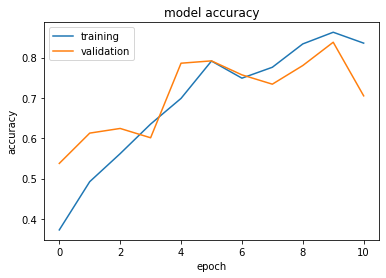

Validation loss: 0.54
Validation accuracy: 0.798


In [ ]:
from keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_acc', patience=2)
trained_model_5d = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks = [es])
loss, accuracy  = model.evaluate(X_val, y_val, verbose=False)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

Comment on the behavior of the model you obtain based on the learning curves

*8) Test your model on test set. Compute the accuracy. Compute the precision, recall and F1-score for each class.*

The best model obtained was the second with L2 regularization ---> max validation reached 89% whix is the best one

SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [59]:
from sklearn import metrics
predict=model2.predict(X_test)
results=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(predict,axis=1),digits=3)
print(results)

              precision    recall  f1-score   support

           0      0.976     0.820     0.891        50
           1      0.890     0.903     0.897        72
           2      0.793     0.902     0.844        51

    accuracy                          0.879       173
   macro avg      0.887     0.875     0.877       173
weighted avg      0.887     0.879     0.880       173



# Convolutional Neural Network

Now we will try to solve the same problem but using a convolutional neural network.

*9) Repeat the same steps as Question (7) above but using a CNN.*

The CNN method  is taken from: Introducing convolutional neural networks using keras on DataCamp (Chapter 1) --> This is not the required datacamp https://campus.datacamp.com/courses/image-processing-with-keras-in-python/image-processing-with-neural-networks?ex=4

I tried training of different models: 
1)CNN w/o any reg
2)CNN w batch normalization 
3) CNN with drop out 
I achieved the highest validation accuracy in 1. By trial and error I think it is better to get higher accuracies in models that are regularized as we did in question 7 but I had no time to try many values for the CNN paramamters. 

In [ ]:
#1) Flatten the image 

In [61]:
X_train=X_train.reshape(X_train.shape[0],224,224,3)
X_test=X_test.reshape(X_test.shape[0],224,224,3)
X_val=X_val.reshape(X_val.shape[0],224,224,3)

2) Build the CNN

In [96]:
from keras.layers import Dense, Conv2D, Flatten

model4=Sequential()

model4.add(Conv2D(5, kernel_size=7, activation='relu',
                 input_shape=(224, 224, 3)))
model4.add(Conv2D(15, kernel_size=8, activation='relu'))
model4.add(Flatten())
model4.add(Dense(3, activation='softmax'))
model4.summary()


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 218, 218, 5)       740       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 211, 211, 15)      4815      
_________________________________________________________________
flatten_11 (Flatten)         (None, 667815)            0         
_________________________________________________________________
dense_185 (Dense)            (None, 3)                 2003448   
Total params: 2,009,003
Trainable params: 2,009,003
Non-trainable params: 0
_________________________________________________________________


Train the network 

Epoch 1/14
23/23 - 1s - loss: 2.6840 - accuracy: 0.5696 - val_loss: 0.6526 - val_accuracy: 0.7615
Epoch 2/14
23/23 - 1s - loss: 0.4383 - accuracy: 0.8582 - val_loss: 0.5048 - val_accuracy: 0.7846
Epoch 3/14
23/23 - 1s - loss: 0.2507 - accuracy: 0.9175 - val_loss: 0.3688 - val_accuracy: 0.8385
Epoch 4/14
23/23 - 1s - loss: 0.1244 - accuracy: 0.9665 - val_loss: 0.2609 - val_accuracy: 0.8923
Epoch 5/14
23/23 - 1s - loss: 0.1180 - accuracy: 0.9665 - val_loss: 0.3373 - val_accuracy: 0.9077
Epoch 6/14
23/23 - 1s - loss: 0.1631 - accuracy: 0.9742 - val_loss: 0.2874 - val_accuracy: 0.8769
Epoch 7/14
23/23 - 1s - loss: 0.0778 - accuracy: 0.9794 - val_loss: 0.2723 - val_accuracy: 0.9000
Epoch 8/14
23/23 - 1s - loss: 0.0581 - accuracy: 0.9794 - val_loss: 0.2286 - val_accuracy: 0.9231
Epoch 9/14
23/23 - 1s - loss: 0.0276 - accuracy: 0.9948 - val_loss: 0.2164 - val_accuracy: 0.9308
Epoch 10/14
23/23 - 1s - loss: 0.0390 - accuracy: 0.9820 - val_loss: 0.3305 - val_accuracy: 0.9000
Epoch 11/14
23/23 -

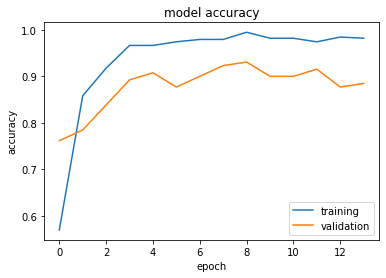

Validation loss: 0.552
Validation accuracy: 0.902


In [97]:
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history= model4.fit(X_train,y_train, validation_split=0.25,batch_size=17,verbose=2,epochs=14)
model4.evaluate(X_test, y_test)
loss, accuracy  = model4.evaluate(X_val, y_val, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

Chapter 4 Slides Understanding and Improving Deep Convolutional Networks---> Addding Batch Normalization  

In [180]:
from keras.layers import BatchNormalization

model5=Sequential()

model5.add(Conv2D(24, kernel_size=12, activation='relu',input_shape=(224, 224, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(23, kernel_size=8, activation='relu'))
model5.add(Flatten())
model5.add(Dense(3, activation='softmax'))
model5.summary()


Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 213, 213, 24)      10392     
_________________________________________________________________
batch_normalization_9 (Batch (None, 213, 213, 24)      96        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 206, 206, 23)      35351     
_________________________________________________________________
flatten_20 (Flatten)         (None, 976028)            0         
_________________________________________________________________
dense_194 (Dense)            (None, 3)                 2928087   
Total params: 2,973,926
Trainable params: 2,973,878
Non-trainable params: 48
_________________________________________________________________


Training the network 

Epoch 1/20
39/39 - 2s - loss: 13.6289 - accuracy: 0.7552 - val_loss: 41.5744 - val_accuracy: 0.4692
Epoch 2/20
39/39 - 1s - loss: 2.0034 - accuracy: 0.7603 - val_loss: 12.0156 - val_accuracy: 0.3462
Epoch 3/20
39/39 - 1s - loss: 0.3352 - accuracy: 0.8686 - val_loss: 1.3191 - val_accuracy: 0.7000
Epoch 4/20
39/39 - 1s - loss: 0.2439 - accuracy: 0.9175 - val_loss: 0.7162 - val_accuracy: 0.8000
Epoch 5/20
39/39 - 2s - loss: 0.1897 - accuracy: 0.9356 - val_loss: 0.6523 - val_accuracy: 0.8462
Epoch 6/20
39/39 - 1s - loss: 0.1304 - accuracy: 0.9562 - val_loss: 0.6422 - val_accuracy: 0.8385
Epoch 7/20
39/39 - 1s - loss: 0.1075 - accuracy: 0.9613 - val_loss: 0.5612 - val_accuracy: 0.8308
Epoch 8/20
39/39 - 1s - loss: 0.1150 - accuracy: 0.9716 - val_loss: 0.5435 - val_accuracy: 0.8385
Epoch 9/20
39/39 - 1s - loss: 0.1445 - accuracy: 0.9716 - val_loss: 0.6858 - val_accuracy: 0.7231
Epoch 10/20
39/39 - 1s - loss: 0.2155 - accuracy: 0.9510 - val_loss: 0.5158 - val_accuracy: 0.8077
Epoch 11/20
39/3

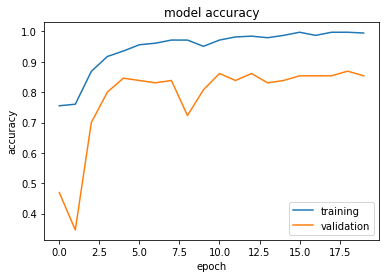

Validation loss: 0.925
Validation accuracy: 0.844


In [182]:
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history= model5.fit(X_train,y_train, validation_split=0.25,batch_size=10,verbose=2,epochs=20)
model5.evaluate(X_test, y_test)
loss, accuracy  = model5.evaluate(X_val, y_val, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

Chapter 4 Slides Understanding and Improving Deep Convolutional Networks---> Addding Dropout to your network 

In [174]:
from keras.layers import Dropout

model6=Sequential()

model6.add(Conv2D(19, kernel_size=10, activation='relu',input_shape=(224, 224, 3)))
model6.add(Dropout(0.3))
model6.add(Conv2D(25, kernel_size=8, activation='relu'))
model6.add(Flatten())
model6.add(Dense(3, activation='softmax'))
model6.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 215, 215, 19)      5719      
_________________________________________________________________
dropout_5 (Dropout)          (None, 215, 215, 19)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 208, 208, 25)      30425     
_________________________________________________________________
flatten_16 (Flatten)         (None, 1081600)           0         
_________________________________________________________________
dense_190 (Dense)            (None, 3)                 3244803   
Total params: 3,280,947
Trainable params: 3,280,947
Non-trainable params: 0
_________________________________________________________________


Epoch 1/8
15/15 - 2s - loss: 4.4616 - accuracy: 0.4021 - val_loss: 1.0796 - val_accuracy: 0.6385
Epoch 2/8
15/15 - 1s - loss: 1.0302 - accuracy: 0.4510 - val_loss: 1.0191 - val_accuracy: 0.6769
Epoch 3/8
15/15 - 1s - loss: 0.8772 - accuracy: 0.6005 - val_loss: 0.9145 - val_accuracy: 0.7231
Epoch 4/8
15/15 - 1s - loss: 0.7349 - accuracy: 0.7113 - val_loss: 0.8102 - val_accuracy: 0.7846
Epoch 5/8
15/15 - 1s - loss: 0.5270 - accuracy: 0.8015 - val_loss: 0.5871 - val_accuracy: 0.8385
Epoch 6/8
15/15 - 1s - loss: 0.4549 - accuracy: 0.8222 - val_loss: 0.5021 - val_accuracy: 0.8231
Epoch 7/8
15/15 - 1s - loss: 0.3187 - accuracy: 0.8918 - val_loss: 0.6173 - val_accuracy: 0.7538
Epoch 8/8
15/15 - 1s - loss: 0.2611 - accuracy: 0.9253 - val_loss: 0.4747 - val_accuracy: 0.8231
6/6 [==============================] - 0s 39ms/step - loss: 0.3538 - accuracy: 0.8613


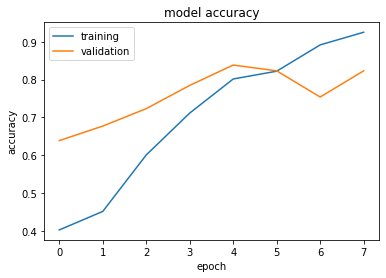

Validation loss: 0.659
Validation accuracy: 0.827


In [175]:
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history= model6.fit(X_train,y_train, validation_split=0.25,batch_size=27,verbose=2,epochs=8)
model6.evaluate(X_test, y_test)
loss, accuracy  = model6.evaluate(X_val, y_val, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Validation loss: {loss:.3}')
print(f'Validation accuracy: {accuracy:.3}')

*10) Evaluate your model showing the same metrics you showed in Question (8).*

The best model is model 4 using CNN w/o regularization having the highest validation accuracy 

In [105]:
from sklearn import metrics
predict=model4.predict(X_test)
results=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(predict,axis=1),digits=3)
print(results)

              precision    recall  f1-score   support

           0      0.842     0.960     0.897        50
           1      0.944     0.944     0.944        72
           2      0.977     0.843     0.905        51

    accuracy                          0.919       173
   macro avg      0.921     0.916     0.916       173
weighted avg      0.925     0.919     0.919       173



https://www.geeksforgeeks.org/numpy-argmax-python/#:~:text=argmax()%20in%20Python,-Last%20Updated%3A%2029&text=29%2D11%2D2018-,numpy.,array%20in%20a%20particular%20axis.

In [138]:
#print a confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
test=np.argmax(y_test,axis=1);
predict=model4.predict(X_test)
pred=np.argmax(predict,axis=1);
cf_matrix = confusion_matrix(test,pred)
print(cf_matrix)


[[48  2  0]
 [ 3 68  1]
 [ 6  2 43]]


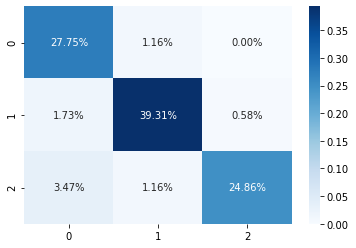

In [140]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

*11) Keeping in mind that in this problem it is very critical to detect as much fires as possible and not misclassify fires as something else, which of the metrics you computed would you be interested in more to know how good the model is at catching as many fire occurences as possible?*

The validation accuracy for sure since it tells how good the model is at catching fires from the whole dataset of images (how many times the fire was correctly determined and when it was falsy detected).

*13) Show some examples of misclassified samples from the test set. Can you think of why the model missed those samples?*

Some features may have not been taken into consideration in the training. The validation accuracy of model 4 is also 90.2% and not 100% (
We all make mistakes) 

Source: https://www.geeksforgeeks.org/numpy-argmax-python/#:~:text=argmax()%20in%20Python,-Last%20Updated%3A%2029&text=29%2D11%2D2018-,numpy.,array%20in%20a%20particular%20axis.

argmax() in Python. numpy. argmax(array, axis = None, out = None) : Returns indices of the max element of the array in a particular axis.--> So if indice is 0 it is Default, at 1 it is Fire and at index 2 it is Smoke

In [139]:
test=np.argmax(y_test,axis=1);
predict=model4.predict(X_test)
pred=np.argmax(predict,axis=1);
print(test)
print(pred)

[1 1 0 0 0 1 2 1 0 0 2 1 0 0 2 2 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 2
 0 1 2 0 0 0 1 2 0 2 2 0 0 2 1 1 2 0 1 1 0 0 1 0 1 2 1 0 0 1 2 1 1 2 1 2 0
 1 0 2 1 0 2 1 0 2 1 1 1 0 0 1 1 1 2 0 0 0 1 2 1 1 2 0 1 1 2 0 0 2 2 2 1 1
 1 1 0 2 0 0 0 1 1 1 0 2 1 1 1 0 1 2 2 2 1 1 2 2 1 2 0 1 0 2 2 2 1 1 2 2 1
 2 2 1 1 2 2 2 2 2 1 2 1 0 1 1 0 1 0 2 2 2 2 2 1 1]
[0 1 0 0 0 1 2 1 0 0 2 1 0 0 2 2 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 2 0 0 0 1 2 0 2 2 0 0 2 1 1 2 0 1 1 0 0 1 0 1 2 1 1 0 1 2 1 1 2 1 2 0
 1 0 2 1 0 1 1 1 2 1 1 1 0 0 1 1 1 2 0 0 0 1 2 1 1 2 0 1 1 2 0 0 2 0 2 1 0
 0 2 0 2 0 0 0 1 1 1 0 2 1 1 1 0 1 2 2 2 1 1 2 2 1 2 0 1 0 2 2 2 1 1 0 2 1
 2 1 1 1 2 2 2 0 2 1 0 1 0 1 1 0 1 0 2 2 2 2 0 1 1]


In [171]:
count=0
for i  in range(0,len(pred)):
  if(pred[i]!=test[i]):
    count=count+1
   
print("The number of false prediction is :",count)


The number of false prediction is : 14


The predicted label is:
Default


But Unfortunately the actual label:
Fire


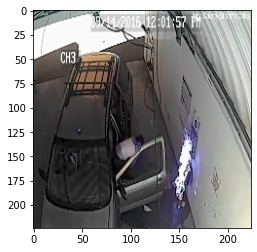

In [163]:
def whichlabel(a):
  if(a==0):
    print("Default")
  elif(a==1):
    print("Fire")
  elif(a==2): 
    print("Smoke")

for i  in range(0,10):
   if(pred[i]!=test[i]):
    print("The predicted label is:") 
    whichlabel(pred[i])
    print('\n') 
    print("But Unfortunately the actual label:")
    whichlabel(test[i])
    plt.imshow(X_test[i])
    break
    
  

The predicted label is:
Default
But Unfortunately the actual label:
Smoke


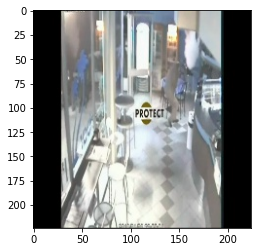

In [164]:
for i  in range(20,40):
   if(pred[i]!=test[i]):
    print("The predicted label is:")
    whichlabel(pred[i])
    print("But Unfortunately the actual label:")
    whichlabel(test[i])
    plt.imshow(X_test[i])
    break

The predicted label is:
Fire
But Unfortunately the actual label:
Default


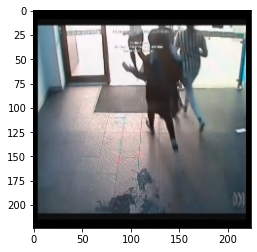

In [166]:
for i  in range(60,100):
   if(pred[i]!=test[i]):
    print("The predicted label is:")
    whichlabel(pred[i])
    print("But Unfortunately the actual label:")
    whichlabel(test[i])
    plt.imshow(X_test[i])
    break

*14) What are the advantages of using a CNN to solve an image classification problem instead of a fully connected ANN?*

Source: https://www.quora.com/Why-is-CNN-used-for-image-classification-and-why-not-other-algorithms

https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#:~:text=The%20main%20advantage%20of%20CNN,CNN%20is%20also%20computationally%20efficient.

The main advantage of CNN compared to its predecessors is that it automatically detects the important features without any human supervision (automatic feature extractors from the image). For example, given many pictures of cats and dogs it learns distinctive features for each class by itself. However, If we use a algorithm with pixel vector I lose a lot of spatial interaction between pixels, a CNN effectively uses adjacent pixel information to effectively downsample the image first by convolution and then uses a prediction layer at the end. This is because CNN uses filters and take spatial features (ex. the aaragement of pixels in the image)